In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
filename = 'descriptor_mlp.csv'

In [3]:
data = pd.read_csv(filename, encoding='gb18030').astype(float)

In [4]:
print(data.shape)

(45, 395)


In [5]:
y_true = data.iloc[:, -3]
y_pred = data.iloc[:, -2]

In [6]:
def linear_regression(x, y):
    x = np.array(x)
    y = np.array(y)
    N = len(x)
    sumx = sum(x)
    sumy = sum(y)
    sumx2 = sum(x ** 2)
    sumxy = sum(x * y)
    A = np.mat([[N, sumx], [sumx, sumx2]])
    b = np.array([sumy, sumxy])
    return np.linalg.solve(A, b)

In [7]:
a0, a1 = linear_regression(y_true, y_pred)

In [8]:
print('a0=', a0, 'a1=', a1)

a0= 294.5702265914102 a1= 0.48402552076405336


In [9]:
def mean_relative_error(y_pred, y_test):
    assert len(y_pred) == len(y_test)
    mre = 0.0
    for i in range(len(y_pred)):
        mre = mre + abs((y_pred[i] - y_test[i]) / y_test[i])
    mre = mre * 100/ len(y_pred)
    return mre

In [10]:
from sklearn import metrics
MRE = mean_relative_error(y_pred, y_true)
print('MRE=', MRE)

MRE= 19.697846037489402


In [11]:
def cal_r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    

In [12]:
# maccs: '#d7f9eb', '#80cbac', '#418669', '#0b5b3a'
# morgan: '#e3f2fd', '#439fdb', '#1075b7', '#09456c'
# descriptor: '#fdf1fe', '#cb59d9', '#822b8c', '#540f5c'
# morgan+maccs: '#fef4ec', '#fc9940', '#d26b0f', '#7b3f09'

In [13]:
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist = ['white', '#fdf1fe', '#cb59d9', '#822b8c', '#540f5c']
newcmp = LinearSegmentedColormap.from_list('chaos',clist)

-4.004434433034641


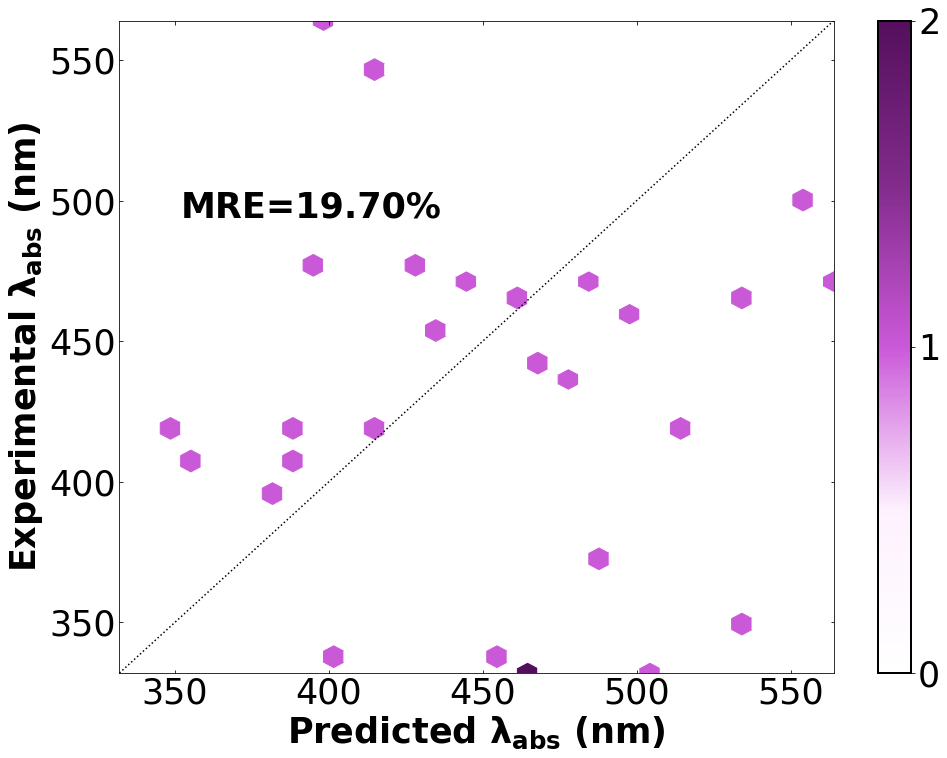

In [14]:
xmin = min(y_true)
xmax = max(y_true)

fontsize=35

fig = plt.figure(figsize=(16, 12))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# plt.grid(linestyle="--")
plt.xlabel(r'Predicted $\mathbf{\lambda_{abs}}$ (nm)', fontsize=fontsize, weight='bold')
plt.ylabel(r'Experimental $\mathbf{\lambda_{abs}}$ (nm)', fontsize=fontsize, weight='bold')
plt.yticks(size=fontsize)
plt.xticks(size=fontsize)

errstr = 'MRE=%.2f%%' % MRE
plt.text(xmin + 20, xmax - 70, errstr, fontsize=fontsize, weight='bold')
# plt.text(-3.5, -0.4, errstr_ee, fontsize=20, weight='bold')
# plt.text(-3.5, -0.4, r_square, fontsize=20, weight='bold')

# 横坐标预测值，纵坐标真实值
hexf = plt.hexbin(y_pred, y_true, gridsize=35, extent=[xmin, xmax, xmin, xmax],
           cmap=newcmp, mincnt=0) # gridsize=27

plt.plot([xmin, xmax], [xmin, xmax], ':', linewidth=1.5, color='black')

lx = [-3.9,0.2]
ly = [a0+a1*x for x in lx]
# plt.plot(lx, ly, 'b', linewidth=2, color='black')
line_text = 'y=%.2fx' % a1 + '%.2f' % a0
# plt.text(-3.5, -0.2, line_text, fontsize=20, weight='bold')

y_line_pred = [a0+a1*x for x in y_true]
r_square = metrics.r2_score(y_pred, y_line_pred)
r_square = 'R$^2$=%.2f' % r_square
# plt.text(-3.5, -0.4, r_square, fontsize=20, weight='bold')
print(metrics.r2_score(y_true, y_pred))

plt.axis([xmin, xmax, xmin, xmax])
ax = plt.gca()
ax.tick_params(top=True, right=True)

x_major_locator=MultipleLocator(50)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(50)

ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=fontsize)

import matplotlib.ticker as ticker
tick_locator = ticker.MaxNLocator(nbins=2)  # colorbar上的刻度值个数
cbar.locator = tick_locator
cbar.update_ticks()

cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)

cbar.ax.tick_params(axis='y', direction='out')

plt.savefig('pics/' + filename[:-4] + '.png')
plt.show()